In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import * 

First five rows and col values 
X1 : 
 [[2.51526543 1.11143935]
 [1.8155981  1.11969719]
 [2.69637316 0.62563218]
 [1.67280531 0.65930057]
 [1.89593761 5.18540259]]  
 y1 :
 [ 1  1  1  1 -1]


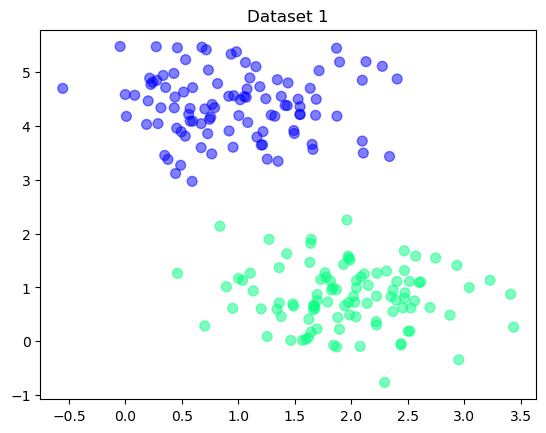

In [2]:
X1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X1[:5], " \n y1 :\n",y1[:5])
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 1")
plt.show()
X1 = X1.T
y1 = y1.T

In [3]:
def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

In [4]:
def plot_svm(X, y, w, b, title ='Plot for linear SVM'):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])
    
    plt.title(title)
    plt.show()

In [5]:
W = np.random.rand(1,2)
b = 0   

In [6]:
np.sum(y1)

0

In [7]:
np.sum((y1 * (np.dot(W, X1) - b)))

-279.73018109361425

In [8]:
w1,b1,costs = fit(X1,y1, .01, 10000, lambd=0.3)

cost at  0  =  239.6003781830603
cost at  1000  =  1.8414830587346698


cost at  2000  =  1.8459666705467555
cost at  3000  =  1.8459775852618119
cost at  4000  =  1.8459776118321314
cost at  5000  =  1.8459776118968123
cost at  6000  =  1.8459776118969422
cost at  7000  =  1.8459776118969422
cost at  8000  =  1.8459776118969422
cost at  9000  =  1.8459776118969422


In [ ]:
a3 = (np.dot(W,X) - b)
p = np.random.rand(a3.shape[0])*0

for i in range(0, a3.shape[1]):
        if a3[0,i] > 0:
            p[0,i] = 1
        else:
            p[0,i] = -1

In [9]:
print("For dataset 1, score:" ,accuracy_score(predict(W=w1, b = b1, X= X1),y1))
plot_svm(X1.T, y1.T, w1, b1, title= 'Linear SVM for dataset 1')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

First five rows and col values 
X2 : 
 [[ 0.3378749  -0.21360361]
 [ 0.13839338 -0.08782407]
 [ 0.81438647  0.52774632]
 [ 2.00630957  0.27112908]
 [ 1.94717133  0.3625258 ]]  
 y2 :
 [ 1  1  1  1 -1]


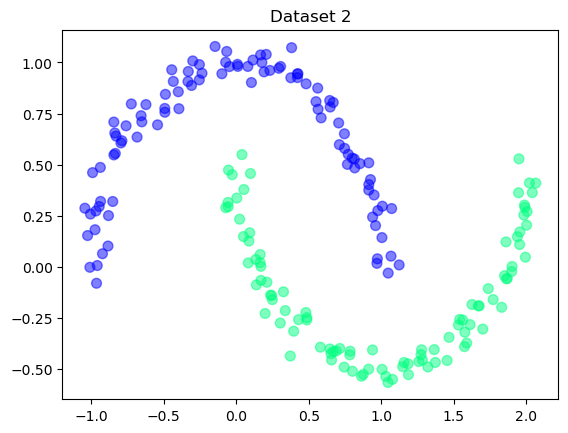

In [ ]:
X2, y2 = make_moons(n_samples=200, noise=.05)
y2 = np.where(y2 <= 0, -1, 1)
print("First five rows and col values \nX2 : \n",X2[:5], " \n y2 :\n",y1[:5])
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 2")
plt.show()

In [ ]:
w2,b2,costs = fit(X2,y2, .3, 10000, lambd=0.03)

cost :  [87.262577   89.66043993]
cost :  [81951.12265065 85437.64737388]
cost :  [163814.32472783 170785.2600693 ]
cost :  [245677.52680502 256132.87276487]
cost :  [327540.72888219 341480.48546008]
cost :  [409403.93095935 426828.09815527]
cost :  [491267.13303651 512175.71085045]
cost :  [573130.33511336 597523.32354534]
cost :  [654993.53719    682870.93624018]
cost :  [736856.73926664 768218.54893501]


ValueError: too many values to unpack (expected 2)

For dataset 2, score: 0.795


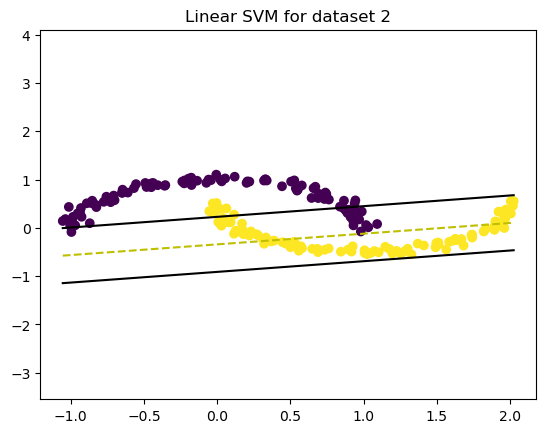

In [ ]:
print("For dataset 2, score:" ,accuracy_score(predict(W=w2, b = b2, X= X2),y2))
plot_svm(X2, y2, w2, b2, title= 'Linear SVM for dataset 2')